<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_deep_csat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔷 **Project Goal Analysis**

**Goal Statement:** Develop a deep learning model to predict CSAT scores using customer interaction and feedback data.

**Purpose:**

To monitor and enhance customer satisfaction.

To enable real-time predictions for improving service quality and customer loyalty.

**Implication:** This sets the foundation for a practical business application, emphasizing actionable insights and continuous feedback loops.

🔷** Specific Objectives Analysis**

**Data Preparation**

Focus: Cleaning and preprocessing the data.

Importance: Ensures the dataset is suitable for deep learning, which is highly sensitive to noisy or incomplete data.

**Feature Engineering**

Focus: Identifying and creating features that most impact CSAT prediction.

Value: Helps improve model performance by using relevant inputs.

**Model Development**

Focus: Designing and training an Artificial Neural Network (ANN).

Goal: To create an accurate predictor for CSAT.

**Evaluation**

Focus: Using metrics to evaluate model accuracy and validate it.

Critical for: Ensuring the model generalizes well to new data.

**Insight Generation**

Focus: Understanding predictions to identify trends/patterns.

Business Use: Enables service improvement based on model outputs.

**Local Deployment**

Focus: Deploying the model in a local system.

Benefit: Offers ongoing predictions and supports business decision-making.

Note: Deployment is scheduled to be discussed during a video presentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/iqbal_csat/eCommerce_Customer_support_data.csv")

In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

Column Name                     	Likely Meaning

Unique id :  A unique identifier for each record, usually a number or code that distinguishes one row from another.

channel_name :	The communication channel through which the customer interacted, e.g., phone call, email, chat, app, website.

category :	A broader classification of the issue, product, or service (e.g., "Delivery Issues," "Payment Issues," etc.).

Sub-category :	A more specific classification under the main category (e.g., if category is "Delivery," sub-category might be "Late Delivery").

Customer Remarks :	Any comments, complaints, or notes made by the customer describing their experience or problem.

Order_id :	The ID related to a customer's order; helps link the issue to a specific transaction.
order_date_time :	The date and time when the customer placed the order.
Issue_reported at	The date and time when the customer reported an issue with their order.

issue_responded :	The date and time when an agent first responded to the customer’s reported issue.

Survey_response_Date :	The date when the customer submitted a feedback survey, often after the interaction.

Customer_City :	The city from which the customer placed the order or reported the issue.

Product_category :	The type or class of product involved in the order (e.g., Electronics, Clothing, Food, etc.).

Item_price :	The price of the item involved in the order, likely in local currency.

connected_handling_time :	The amount of time (in minutes or seconds) an agent spent actively handling the customer's issue after they connected.

Agent_name :	The name of the agent who handled the customer's query or complaint.

Supervisor :	The name of the agent's immediate supervisor responsible for overseeing the agent's work.

Manager :	The name of the higher-level manager above the supervisor.

Tenure Bucket :	The length of time the agent has been employed, often grouped into ranges like "0-6 months," "6-12 months," etc.

Agent Shift :	The work shift the agent was assigned to (e.g., Morning, Afternoon, Night).

CSAT Score :	Customer Satisfaction Score — a rating given by the customer (often from 1 to 5) indicating their satisfaction with the service.

In [ ]:
df.sample(2).T

,34502,84081
Unique id,be2b0081-2205-4c42-a575-51d8060d3400,e0cde60c-95de-46f1-9ab0-350c5aa70baa
channel_name,Outcall,Outcall
category,Returns,Order Related
Sub-category,Reverse Pickup Enquiry,Delayed
Customer Remarks,I already raised my return request with in ret...,?????? ?? ?????? ??? ?? ???
Order_id,NaN,371fda6d-e75f-437c-960c-21770846601a
order_date_time,NaN,25-08-2023 20:40
Issue_reported at,13-08-2023 22:09,30-08-2023 19:18
issue_responded,13-08-2023 22:23,31-08-2023 15:40
Survey_response_Date,13-Aug-23,31-Aug-23


In [ ]:
df.shape

(85907, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
#imputing
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
#Convert order_date_time to datetime in pandas:
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')

In [ ]:
#Lets you extract parts of the date:
df['order_date'] = df['order_date_time'].dt.date
df['order_hour'] = df['order_date_time'].dt.hour
df['order_month'] = df['order_date_time'].dt.month

In [ ]:
#Convert issue_reported at to datetime:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')

In [ ]:
##Lets you extract parts of the date from issue_reported
df['issue_reported_date'] = df['Issue_reported at'].dt.date
df['issue_reported_hour'] = df['Issue_reported at'].dt.hour
df['issue_reported_month'] = df['Issue_reported at'].dt.month


In [ ]:
#convert issue responded to datatime
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')

In [ ]:
###Lets you extract parts of the date from issue_responded
df['issue_responded_date'] = df['issue_responded'].dt.date
df['issue_responded_hour'] = df['issue_responded'].dt.hour
df['issue_responded_month'] = df['issue_responded'].dt.month

In [ ]:
#convert Survey_response_Date to datetime
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

<ipython-input-21-71b8081e848f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')


In [ ]:
#Lets you extract parts of the date from Survey_response_Date
df['Survey_response_Date_date'] = df['Survey_response_Date'].dt.date
df['Survey_response_Date_hour'] = df['Survey_response_Date'].dt.hour

In [ ]:
df.head(1).T

,0
Unique id,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f
channel_name,Outcall
category,Product Queries
Sub-category,Life Insurance
Customer Remarks,Good
Order_id,c27c9bb4-fa36-4140-9f1f-21009254ffdb
order_date_time,2023-09-08 11:55:00
Issue_reported at,2023-01-08 11:13:00
issue_responded,2023-01-08 11:47:00
Survey_response_Date,2023-08-01 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique id                  85907 non-null  object        
 1   channel_name               85907 non-null  object        
 2   category                   85907 non-null  object        
 3   Sub-category               85907 non-null  object        
 4   Customer Remarks           85907 non-null  object        
 5   Order_id                   85907 non-null  object        
 6   order_date_time            77918 non-null  datetime64[ns]
 7   Issue_reported at          31974 non-null  datetime64[ns]
 8   issue_responded            31885 non-null  datetime64[ns]
 9   Survey_response_Date       85907 non-null  datetime64[ns]
 10  Customer_City              85907 non-null  object        
 11  Product_category           85907 non-null  object        
 12  Item

In [ ]:
#Handle Categorical Data ohe
# from sklearn.preprocessing import OneHotEncoder

# for i in df.columns:
#   if df[i].dtype=='object':
#     df=pd.get_dummies(df,columns=[i],drop_first=True)


In [ ]:
# Check and handle missing values first
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Apply OHE only on relevant columns
categorical_cols = df.select_dtypes(include='object').columns

# Only encode columns with a reasonable number of unique categories
for col in categorical_cols:
    if df[col].nunique() < 50:  # Example threshold to limit high cardinality
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [ ]:
df.head()

,Unique id,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Item_price,...,Survey_response_Date_date_2023-08-22,Survey_response_Date_date_2023-08-23,Survey_response_Date_date_2023-08-24,Survey_response_Date_date_2023-08-25,Survey_response_Date_date_2023-08-26,Survey_response_Date_date_2023-08-27,Survey_response_Date_date_2023-08-28,Survey_response_Date_date_2023-08-29,Survey_response_Date_date_2023-08-30,Survey_response_Date_date_2023-08-31
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Life Insurance,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-09-08 11:55:00,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,HYDERABAD,5660.774846,...,False,False,False,False,False,False,False,False,False,False
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Product Specific Information,Good,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-09-08 11:55:00,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,HYDERABAD,5660.774846,...,False,False,False,False,False,False,False,False,False,False
2,200814dd-27c7-4149-ba2b-bd3af3092880,Installation/demo,Good,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-09-08 11:55:00,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,HYDERABAD,5660.774846,...,False,False,False,False,False,False,False,False,False,False
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Reverse Pickup Enquiry,Good,5aed0059-55a4-4ec6-bb54-97942092020a,2023-09-08 11:55:00,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,HYDERABAD,5660.774846,...,False,False,False,False,False,False,False,False,False,False
4,ba903143-1e54-406c-b969-46c52f92e5df,Not Needed,Good,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-09-08 11:55:00,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,HYDERABAD,5660.774846,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
 #Code Example (MinMaxScaler):

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df)

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns and datetime columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = df.select_dtypes(include=['datetime']).columns

# Separate datetime columns from the main dataframe
df_numeric = df[numeric_cols]
df_datetime = df[datetime_cols]

# Apply MinMaxScaler only to numeric columns
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

# Concatenate the datetime columns back to the scaled data
df_final = pd.concat([df_scaled, df_datetime], axis=1)

In [ ]:
# Drop datetime columns
df_numeric = df.select_dtypes(exclude=['datetime64[ns]', 'object'])

# Optional: reset index if needed
df_numeric = df_numeric.reset_index(drop=True)

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [ ]:
df_scaled

array([[0.03430793, 0.23283022, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03430793, 0.23283022, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03430793, 0.23283022, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03430793, 0.23283022, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03430793, 0.23283022, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.03430793, 0.23283022, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Separate Features and Target
x=df_scaled[:,:-1]
y=df_scaled[:,-1]

In [ ]:
#Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Input layer (input_dim specifies the number of features in X)
model.add(Dense(64, input_dim=x.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
# For regression (use a single neuron with no activation):
model.add(Dense(1))

# For classification (use softmax for multi-class or sigmoid for binary classification):
# model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # For multi-class
# model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])  # Use appropriate loss for classification or regression

# For classification, use 'categorical_crossentropy' or 'binary_crossentropy' for binary classification:
# model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x, y, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9731 - loss: nan
Epoch 2/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9725 - loss: nan
Epoch 3/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9731 - loss: nan
Epoch 4/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9728 - loss: nan
Epoch 5/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9730 - loss: nan
Epoch 6/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9728 - loss: nan
Epoch 7/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9723 - loss: nan
Epoch 8/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9713 - loss: nan
Epoch 9/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9721 - loss: nan
Epoch 10/10
2685/2685 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9733 - loss: nan


In [ ]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(x,y)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

2685/2685 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9996 - loss: nan
Training Loss: nan, Training Accuracy: 0.9721908569335938


In [ ]:
#Insight Generation

#Focus: Understanding predictions to identify trends/patterns.

In [ ]:
# Generate predictions
predictions = model.predict(x_test)
# Flatten the arrays (just in case they are 2D)
predictions = predictions.flatten()
y_true = y.flatten()

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print("Shape of y:", y.shape)
print("Shape of predictions:", predictions.shape)

Shape of y: (85907,)
Shape of predictions: (17182,)


In [ ]:
y_true = y.flatten()
y_pred = predictions.flatten()

In [ ]:
print("Equal size:", len(y_true) == len(y_pred))  # Should be True

Equal size: False


In [ ]:
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_true: (85907,)
Shape of y_pred: (17182,)


In [ ]:
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]
y_pred = y_pred[:min_len]

In [ ]:
print("Unique values in predictions:", np.unique(y_pred))

Unique values in predictions: [nan]


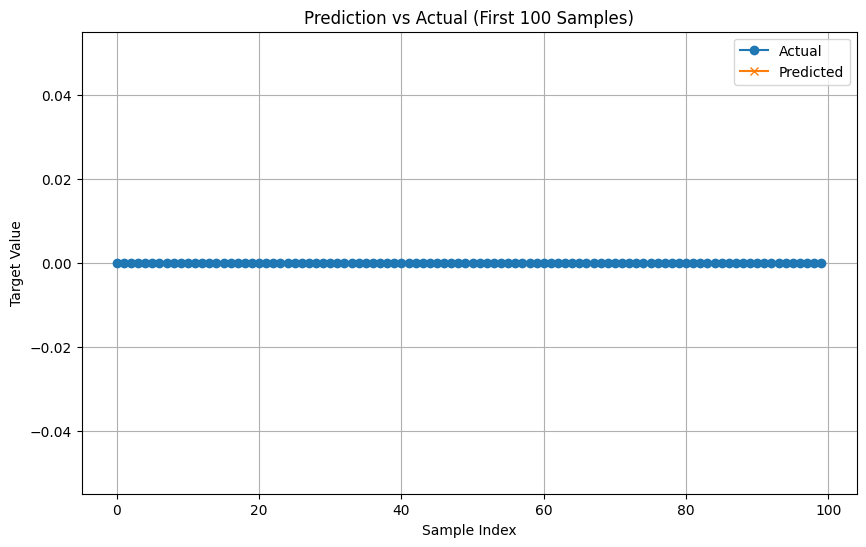

In [ ]:
# Optional: Line Plot of Predictions vs Actual (Index-wise)

plt.figure(figsize=(10, 6))
plt.plot(y_true[:100], label="Actual", marker='o')
plt.plot(predictions[:100], label="Predicted", marker='x')
plt.title("Prediction vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()